# Author:Shashank
# General Feature Extraction
## File lloading
# wordsCOunt
# Characters COunt
# average characters per word
# stop words count
# count # and @
# If numeric digits are present of not
# upper Case word Counts

## Preprocessing and cleaning
# Lower case
# contraction to Expansion
# Email removal and counts
# Url removal and counts
# Removal of Retweets
# removal of special characters
# Removal of multiple spaces
# Removal of accented characters
# Removal of HTML 
# Removal of Stop words
# Conversion into base form of words
# Common occuring words Removal
# Word Cloud
# Spelling Correction
# Tokenization
# Lemmatization
# Detecting Entities using NER
# Noun Detection
# Language Detection
# Sentence Translation
# Using Inbuilt Sentiment Classifier


# Advance Text Preprocessing and Deature Extraction
# N-gram, Bi-gram 
# Bag of words
# Term Frequncy Calculation
# Inverse Document Frequency
# TFIDF 
# Word Embedding Word2Vec using Spacy

# Machine Learning Models for Text Classification
##### SGDClasssifer
##### LogisticRegression
##### LogisticRegressionCV
##### LinearSVC
##### RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np


In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
real=pd.read_csv('truenews.csv',encoding='latin1')

In [5]:
fake=pd.read_csv('fakenews.csv',encoding='latin1')

In [6]:
print(fake['text'].iloc[0])

This is Indian map redesigned by an American CEO where he marked the Indian states population which is almost equal to population of some of the countries. He tried to explain to his employees that India is indirectly handling COVID-19 situation of so many countries. It's about the management of the problem in an efficient manner. He praised Modiji in this unique way. The world is recognising efforts of Modiji but some insider slaves and traitors are still criticising Modiji of mismanagement of COVID-19 in India.


In [7]:
real.describe()

,fake
count,3566.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [8]:
fake.describe()

,Unnamed: 0,fake
count,40.000000,40.0
mean,20.175000,1.0
std,12.078562,0.0
min,0.000000,1.0
25%,9.750000,1.0
50%,20.500000,1.0
75%,30.250000,1.0
max,40.000000,1.0


In [9]:
fake=fake.drop('Unnamed: 0',axis=1)

In [10]:
real=real.drop('Unnamed: 0',axis=1)

In [11]:
real['Outcome']=1

In [12]:
fake['Outcome']=0

In [13]:
real=real.drop('fake',axis=1)

In [14]:
fake=fake.drop('fake',axis=1)

In [15]:
real.head()

,title,text,Outcome
0,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,1
1,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,1
2,U.S. Senate passes $2T coronavirus relief package,The Senate late Wednesday passed an unparallel...,1
3,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,1
4,The latest on the coronavirus outbreak for Mar...,Â Trudeau says rules of Quarantine Act will...,1


In [16]:
real.describe()

,Outcome
count,3568.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [17]:
fake.describe()

,Outcome
count,1665.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [18]:
real['content']=real['title']+' ' +real['text']
fake['content']=fake['title']+ ' ' +fake['text']

In [19]:
real["content"][0]=real["content"][0]+'@'+'9+10'

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
for i in real.index:
    real.iloc[i]=real.iloc[i].str.lower()
for i in fake.index:
    fake.iloc[i]=fake.iloc[i].str.lower()

In [21]:
real['Outcome']=1
fake['Outcome']=0

In [22]:
real.replace('NaN',np.NaN,inplace=True)
fake.replace('NaN',np.NaN,inplace=True)

In [23]:
real.isnull().sum(axis = 0)
fake.isnull().sum(axis=0)

title      324
text         6
Outcome      0
content    328
dtype: int64

In [24]:
fake['content']=fake['content'].fillna('Fake Fake this is fake source is absent.')

In [25]:
real=real.dropna()

In [26]:
fake['text']=fake['text'].fillna('We insure this is a fake news')

In [27]:
fake.describe()

,Outcome
count,1665.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


#function for preprocessing
# def preprocess(pandas_series):
#####    pandas_series=pandas_series.apply(lambda x:re.sub("[^A-Z a-z 0-9-]+", "",x))
#####    pandas_series=pandas_series.apply(lambda x:" ".join(x.split()))
#####    return(pandas_series)

In [28]:
real['content']=real['content'].apply(lambda x:re.sub("[^A-Z a-z 0-9-]+", "",x))
real['content']=real['content'].apply(lambda x:" ".join(x.split()))
fake['content']=fake['content'].apply(lambda x:re.sub("[^A-Z a-z 0-9-]+", "",x))
fake['content']=fake['content'].apply(lambda x:" ".join(x.split()))


# we need to replace multiplce space

In [29]:
real.head()

,title,text,Outcome,content
0,coronavirus a 'wake-up call' for canada's pres...,canadian pharmacies are limiting how much medi...,1,coronavirus a wake-up call for canadas prescri...
1,yukon gov't names 2 possible sources of corona...,the yukon government has identified two places...,1,yukon govt names 2 possible sources of coronav...
2,u.s. senate passes $2t coronavirus relief package,the senate late wednesday passed an unparallel...,1,us senate passes 2t coronavirus relief package...
3,coronavirus: the latest in drug treatment and ...,scientists around the world are racing to find...,1,coronavirus the latest in drug treatment and v...
4,the latest on the coronavirus outbreak for mar...,â trudeau says rules of quarantine act will...,1,the latest on the coronavirus outbreak for mar...


In [30]:
fake.head()

,title,text,Outcome,content
0,a map of india is being shared around on socia...,this is indian map redesigned by an american c...,0,a map of india is being shared around on socia...
1,migrants defying lockdown at mumbai's bandra s...,an incident where a large gathering comprising...,0,migrants defying lockdown at mumbais bandra st...
2,muslims busted: they stole millions in govât...,print they should pay all the back all the mon...,0,muslims busted they stole millions in govt ben...
3,re: why did attorney general loretta lynch ple...,why did attorney general loretta lynch plead t...,0,re why did attorney general loretta lynch plea...
4,breaking: weiner cooperating with fbi on hilla...,red state : \nfox news sunday reported this mo...,0,breaking weiner cooperating with fbi on hillar...


In [31]:
real_train=real.iloc[:1000]
real_test=real.iloc[1000:]
fake_train=fake.iloc[:1000]
fake_test=fake.iloc[1000:]


In [32]:
real_train=real_train.reset_index()
real_test=real_test.reset_index()
fake_train=fake_train.reset_index()
fake_test=fake_test.reset_index()

In [33]:
real_train.drop(['index'],axis=1,inplace=True)
real_test.drop(['index'],axis=1,inplace=True)
fake_train.drop(['index'],axis=1,inplace=True)
fake_test.drop(['index'],axis=1,inplace=True)

In [34]:
train=pd.DataFrame()
test=pd.DataFrame()
train=pd.concat([real_train,fake_train],ignore_index=True)
test=pd.concat([real_test,fake_test],ignore_index=True)

In [35]:
train.describe()

,Outcome
count,2000.000000
mean,0.500000
std,0.500125
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [36]:
test.describe()

,Outcome
count,3231.000000
mean,0.794181
std,0.404361
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [38]:
content_train=[]
for i in range(len(train['content'])):
    content_train.append(train['content'][i])
trianOutcome=np.array(train['Outcome'])

In [39]:
content_test=[]
for i in range(len(test.index)):
    content_test.append(test['content'][i])
testOutcome=np.array(test['Outcome'])

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [43]:
global dictionary
dictionary={}
def perfect_k(n):
    countvector=CountVectorizer(ngram_range=(1,1))
    traindataset=countvector.fit_transform(content_train)
    test_dataset=countvector.transform(content_test)
    for i in range(1,n):
        model=RandomForestClassifier(n_estimators=i,criterion='entropy')
        model.fit(traindataset,trianOutcome)
        prediction=model.predict(test_dataset)
        score=accuracy_score(testOutcome,prediction)
        dictionary[i]=score
        

In [46]:
perfect_k(33)

In [47]:
dictionary
# prediction=model.predict(test_dataset)

{1: 0.9040544722995977,
 2: 0.7672547199009595,
 3: 0.9142680284741566,
 4: 0.8972454348498917,
 5: 0.9164345403899722,
 6: 0.9158155369854534,
 7: 0.9644073042401733,
 8: 0.9492417208294646,
 9: 0.9740018570102136,
 10: 0.9362426493345714,
 11: 0.9510987310430208,
 12: 0.9455277004023522,
 13: 0.9783348808418446,
 14: 0.9551222531723924,
 15: 0.9699783348808418,
 16: 0.9548127514701331,
 17: 0.9715258433921387,
 18: 0.9619312906220984,
 19: 0.965026307644692,
 20: 0.9668833178582482,
 21: 0.9631692974311359,
 22: 0.9594552770040236,
 23: 0.9671928195605076,
 24: 0.9671928195605076,
 25: 0.9783348808418446,
 26: 0.9644073042401733,
 27: 0.9740018570102136,
 28: 0.9634787991333952,
 29: 0.9736923553079542,
 30: 0.9668833178582482,
 31: 0.9746208604147323,
 32: 0.9696688331785824}

In [57]:
best_n=max(dictionary,key=dictionary.get)
print(best_n)
dictionary[best_n]

13


0.9783348808418446

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

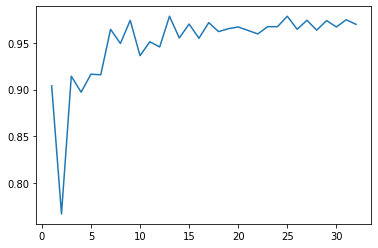

In [59]:
plt.plot(*zip(*sorted(dictionary.items())))

# So lets create the model now

In [60]:
countvector=CountVectorizer(ngram_range=(1,1))
traindataset=countvector.fit_transform(content_train)
testdataset=countvector.transform(content_test)


In [61]:

model=RandomForestClassifier(n_estimators=best_n,criterion='entropy')
model.fit(traindataset,trianOutcome)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
prediction=model.predict(testdataset)
score=accuracy_score(testOutcome,prediction)

In [63]:
score

0.9591457753017641

In [64]:
print(classification_report(testOutcome,prediction))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       665
           1       0.99      0.96      0.97      2566

    accuracy                           0.96      3231
   macro avg       0.92      0.96      0.94      3231
weighted avg       0.96      0.96      0.96      3231



In [65]:
def predictor(list_of_words):
    for i in range(len(list_of_words)):
        list_of_words[i]=list_of_words[i].replace("[^a-zA-Z]"," ")
        list_of_words[i]=list_of_words[i].lower()
        
    test_dataset=countvector.transform(list_of_words)
    prediction=model.predict(test_dataset)
    return prediction

In [67]:
def predictor(input_list):
    clean_list=[]
    for i in input_list:
        i=re.sub("[^A-Z a-z 0-9-]+", "",i)
        i=' '.join(i.split())
        i=i.lower()
        clean_list.append(i)
    clean_test_dataset=countvector.transform(clean_list)
    final_result=model.predict(clean_test_dataset)
    print(final_result)

In [96]:
#Now testing the model

predictor([fake_test['content'][100]])

[0]
